# AulaP12

- **Método das Potências** para aproximação do maior valor próprio (em módulo).


***
### Problema: 

#### Dada uma matriz de coeficientes  reais $A\in \mathcal{M}_{n\times n}$ como calcular numericamente os seus valores próprios?

De outra forma, como aproximar os valores $\lambda \in \mathbb{C}$ para os quais existem vectores próprios 
$\mathbf{u}\in \mathbb{R}^n  (\mathbf{u}\neq \mathbf{0})$ tais que $A\mathbf{u}=\lambda \mathbf{u}$ ?

- **Obs.**: encontrar os zeros do polinómio característico dado por $det(A-\lambda I)$ não é computacionalmente viável para $n$ grande.


## Método das Potências:


- **Ideia**: Dado um par valor, vector próprio $(\lambda,\mathbf{u})$ tem-se:

$$\lambda \mathbf{u}=A\mathbf{u} \Leftrightarrow \lambda \mathbf{u}\cdot \mathbf{u}=A\mathbf{u}\cdot \mathbf{u}\Leftrightarrow \lambda=\frac{A\mathbf{u}\cdot \mathbf{u}}{\mathbf{u}\cdot \mathbf{u}}$$

- **Obs.**: Se $$||\mathbf{u}||=1 \Longrightarrow \lambda= A\mathbf{u}\cdot \mathbf{u}.$$

Prova-se (para determinadas matrizes $A$) que dado um vector $\mathbf{v}^0\neq 0$ a sucessão

$$\mathbf{v}^{n+1}=A \mathbf{v}^{n}=A^2 \mathbf{v}^{n-1}=A^3 \mathbf{v}^{n-2}=\cdots=A^n \mathbf{v}^0$$

converge para um vector próprio associado ao valor próprio de maior valor absoluto.

(Ver **Demonstração** e.g.: Quarteroni A.,  Sacco, Salleri, *Numerical Mathematics*, Text in Applied Mathematics 37. 2000, Springer.)



 ### Proposição:
 
 Se  $A\in \mathcal{M}_{n\times n}$ for uma matriz diagonalizável (i.e.: existe uma base de vectores próprios para $\mathbb{R}^n$) e se, para além disso, existir um valor próprio dominante e real $(|\lambda_1|>|\lambda_2|\geq |\lambda_3|\geq \dots |\lambda_n|$) então o método das potências converge e permite aproximar o valor próprio dominante $\lambda_1$ bem como o seu vector próprio associado $\mathbf{v}$. 
 
 
 
- **Algoritmo**  (normalizado) $n\in\mathbb{N}$:


Seja $\mathbf{v}^0\in\mathbb{R}$ um vector unitário.

$$\mathbf{z}^n=A\mathbf{v}^{n-1}$$

$$\mathbf{v}^n=\frac{\mathbf{z}^n }{||\mathbf{z}^n||_2}$$ 

$$ \lambda_1^n=A\mathbf{v}^n \cdot  \mathbf{v}^n $$

### Algumas notas:

 - A convergência do método depende da separação dos valores próprios. i.e.: $$\frac{|\lambda_2|}{|\lambda_1|}<< 1$$ 
no entanto prova-se que o método também em converge em condições mais gerais, e.g., quando existem dois valores próprios dominantes com o mesmo valor absoluto.



 - O método não requer que a aproximação do vector próprio seja normalizada, no entanto, e do ponto de vista da implementação computacional, a normalização do vector em cada passo impede os erros de *overflow*/*underflow* quando  $|\lambda_1|>>1$ ou $|\lambda_1|<<1$.



#### Exemplo:

Considere a matriz

$$A=\begin{bmatrix}
1&2&0\\
-2&1&2\\
1&3&1
\end{bmatrix}$$

1. Utilize o Teorema de Gershgorin para localizar os valores próprios de $A$. 
- Considere a aproximação inicial $\mathbf{v}^0=(1,2,1)$ e efectue três iterações do método das potências para aproximar o valor próprio de maior valor absoluto da matriz.
- Implemente o Métodos das Potências para resolver o problema anterior. 

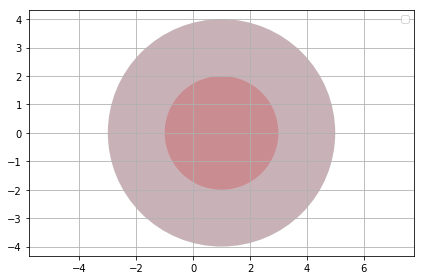

In [2]:
# ver https://matplotlib.org/devdocs/api/_as_gen/matplotlib.patches.Circle.html
# Procurar uma solução mais simples

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

A=np.array([[1,2,0],[-2,1,2],[1,3,1]])

fig, ax = plt.subplots()
GershCircles=[]

D=np.diag(A)
Ma=A-np.diag(D)

for i in range(len(A)):
    rad=np.sum(np.abs(Ma[i,:]))
    circle=plt.Circle((A[i,i],0),rad)
    GershCircles.append(circle)

    
collection = PatchCollection(GershCircles,cmap=plt.cm.hsv, alpha=0.3)
colors = np.linspace(0, 1, len(GershCircles))
collection.set_array(np.array(colors))
ax.add_collection(collection)

plt.axis('equal')
plt.grid()
plt.tight_layout()
plt.legend('best')
plt.show()

In [8]:
# 3)
u=np.array([1.0,2.0,1.0])

MaxIter=100
TOL=0.0

#u*=1./np.sqrt(np.inner(u,u)) # Normaliza o passo inicial
lbdaux=0 #Para controlar o erro
   
for i in range(1,MaxIter):
    u=np.dot(A,u)
    #u*=1.0/np.sqrt(np.inner(u,u)) #Normaliza
    print(u)
    lbda=np.inner(np.dot(A,u),u)/np.inner(u,u)
    error=abs(lbda-lbdaux)
    print(lbda)
    if (error<TOL):
        print('iter=',i)
        break
    
    lbdaux=lbda 
    
print('lambda=',lbda)
print('v1=',u)
print('error=',error)


[5. 2. 8.]
2.2903225806451615
[ 9.  8. 19.]
2.8399209486166006
[25. 28. 52.]
3.086068563092633
[ 81.  82. 161.]
3.0162985257358566
[245. 242. 488.]
2.990396178654624
[ 729.  728. 1459.]
2.998169026358372
[2185. 2188. 4372.]
3.0010668869487964
[ 6561.  6562. 13121.]
3.0002031965297213
[19685. 19682. 39368.]
2.999881454099027
[ 59049.  59048. 118099.]
2.9999774195801954
[177145. 177148. 354292.]
3.0000131717314207
[ 531441.  531442. 1062881.]
3.0000025088981603
[1594325. 1594322. 3188648.]
2.9999985364738495
[4782969. 4782968. 9565939.]
2.9999997212330762
[14348905. 14348908. 28697812.]
3.000000162614011
[43046721. 43046722. 86093441.]
3.0000000309740966
[1.29140165e+08 1.29140162e+08 2.58280328e+08]
2.9999999819317766
[3.87420489e+08 3.87420488e+08 7.74840979e+08]
2.9999999965584334
[1.16226146e+09 1.16226147e+09 2.32452293e+09]
3.00000000200758
[3.4867844e+09 3.4867844e+09 6.9735688e+09]
3.0000000003823963
[1.04603532e+10 1.04603532e+10 2.09207064e+10]
2.9999999997769358
[3.13810596e+1

### Exercício:

Repita o exemplo anterior com  $A$ e $\mathbf{v}^0$ dados por:

$$A=\begin{bmatrix}
4&1&-1&0\\
1&3&-1&0\\
-1&-1&5&2\\
0&0&2&4
\end{bmatrix},\quad\quad \mathbf{v}^0=(0,1,0,0)$$

***
***
#### Caixa de Areia !

In [9]:
### SANDBOX
## Preparação para Resolução:
A=np.array([[4.,1.,-1.,0.],[1.,3.,-1.,0],[-1.,-1.,5.,2.],[0.,0.,2.,4.]])
u=np.array([0,1,0,0])

In [10]:
### Métodos já implementados no módulo numpy.linalg
lbd,v=np.linalg.eig(A)

In [11]:
print(lbd)

[ 2.48586307  4.42800673  7.0861302   2.        ]


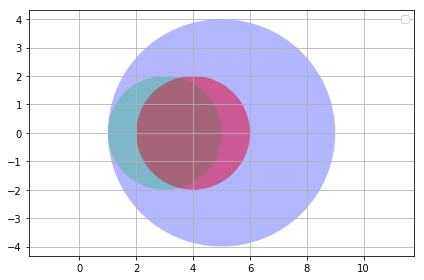

In [12]:
fig, ax = plt.subplots()
GershCircles=[]

D=np.diag(A)
Ma=A-np.diag(D)

for i in range(len(A)):
    rad=np.sum(np.abs(Ma[i,:]))
    circle=Circle((A[i,i],0),rad)
    GershCircles.append(circle)

collection = PatchCollection(GershCircles,cmap=plt.cm.hsv, alpha=0.3)
colors = np.linspace(0, 1, len(GershCircles))
collection.set_array(np.array(colors))
ax.add_collection(collection)


plt.axis('equal')
plt.grid()
plt.tight_layout()
plt.legend('best')
plt.show()
plt.clf()

***
***

## Generalização do Método das Potências

- É possível generalizar o método das potências de forma a aproximar outros valores próprios.

O algoritmo para procurar o valor próprio mais perto de $\mu$ (assumindo que este está separado):

### O Método das Potências Inversas:

- **Algoritmo:**

  Seja $\mathbf{v}^0\in\mathbb{R}$ um vector unitário.

$$ (A-\mu I)\mathbf{z}^n=\mathbf{v}^{n-1}$$

$$\mathbf{v}^n=\frac{\mathbf{z}^n }{||\mathbf{z}^n||_2}$$

$$ \lambda_\mu^n=A\mathbf{v}^n \cdot  \mathbf{v}^n $$



### Exercício:

Considere  $A$ e $\mathbf{v}^0$ dados por:

$$A=\begin{bmatrix}
4&1&-1&0\\
1&3&-1&0\\
-1&-1&5&2\\
0&0&2&4
\end{bmatrix},\quad\quad \mathbf{v}^0=(0,1,0,0)$$

Sabe-se que $A$ tem um valor próprio separado perto de $\mu=2.5$. Utilize o método das potências inversas para aproximar esse valor próprio.

In [15]:
A=np.array([[4.,1.,-1.,0.],[1.,3.,-1.,0],[-1.,-1.,5.,2.],[0.,0.,2.,4.]])
u=np.array([0,1,0,0])
mu=2.5

MaxIter=100
TOL=1.e-15

u=1./np.sqrt(np.inner(u,u))*u # Normaliza o passo inicial
lbdaux=0 #Para controlar o erro

z=np.zeros(3)

for i in range(1,MaxIter):
    z=np.linalg.solve(A-mu*np.identity(4),u) # TPC. Usar o LU estudado
    u=z/np.sqrt(np.inner(z,z)) #Normaliza
    lbda=np.inner(np.dot(A,u),u)
    error=abs(lbda-lbdaux)
    if (error<TOL):
        print('iter=',i)
        break
    
    lbdaux=lbda 
    
print('lambda=',lbda)
print('v1=',u)
print('error=',error)



iter= 7
lambda= 2.48586307066
v1= [ 0.6096698  -0.64514835  0.27797521 -0.36717314]
error= 8.881784197e-16
